# Customer Churn Prediction

<img src="image.png](attachment:image.png)" alt="" style="width:100%; max-width:700px;"/>

 <div style="text-align: center;" style="border: 2px solid black;">
    <img src="images/image.jpeg" alt="Telecom Customer Retention" width="600" height="300">
</div>





## 1. Project Overview

SyriaTel, a telecommunications company faces major issues in retaining its customers.SyriaTel Company has a high churn rate of 14.49% .This churn rate has reduced its revenue and also has made the comapny face very high competition from other Telecommunication companies. Due to this impact the company has hired me to analyse their past data and come up with business insights and new strategies of reducing the customer churn rate.The aim of this project is to analyze past data of SyriaTel telecommunication company and come up with machine learning algorithms to predict whether a customer will churn or not. By analyzing Syrial Tel past data, which includes customer information eg `account length`, charges per call, minutes the customer get from the company,International plan and voice mail plan,and past churn records. By identifying this patterns and major factors that contribute to a customer churning away from SyrialTel, I will be able to predict wether a customer is likely to churn or not.This project involves data understanding, data preparation, exploratory data analysis,building different models, evaluation of the models and deployment of the model. Continuous monitoring and updating of the model will ensure its effectiveness over time, and will enable SyrialTel to put inplace new strategies inorder to retain their customers

## 2.Business Problem

 SyriaTel, a telecommunications company faces major issues in retaining its customers.SyriaTel Company has a high churn rate of 14.49%. Customer churn, the phenomenon where customers discontinue their services, is a significant threat to their business. High churn rates can lead to substantial revenue loss and increased costs associated with acquiring new customers.

To address this challenge, it is essential for SyriaTel to understand the underlying reasons why customers are leaving and identify which customers are most likely to churn. By analyzing SyriaTel customer data, including behavior, usage patterns, and demographic information, I can develop predictive models to forecast churn. These insights will enable the company to implement targeted interventions inorder to retain customers through customer satisfaction.

Main problems addressed by this project are:
 - Revenue loss by SyriaTel
 - Customer Dissatisfaction
 
This project aims to:
- Analyze SyriaTel's historical customer data which includes behavioral,minutes usage patterns,Charges inorder to predict wether a customer will churn or not
- Develop predictive models

## 3.Data Understanding

This customer churn dataset is designed to predict which customers are likely to leave the company. It contains various features that describe customer demographics,account information, service usage patterns, and their churn status  . The dataset is sourced from a Kaggle competition aimed at developing predictive models for customer churn.

**Here's a summary of the columns:**
- state: The state of the customer.
  
- account length: The length of the account in days or months.

- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).

#### Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling modules
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,cross_val_predict,StratifiedKFold
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve,roc_auc_score,classification_report,ConfusionMatrixDisplay# performance metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder # to scale the numeric features

# Algorithms modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
 
 

# Feature Importance modules
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
  

from sklearn.preprocessing import label_binarize
 
 


#### 3.1 Loading The Data

In [2]:
# Import the class 
from customer_churn_analysis import CustomerChurnDataset

In [3]:
# Read my dataset
# Instantiate the class with the file name
df = CustomerChurnDataset('data/Customer_Churn.csv')

In [4]:
df

#### 3.2 DataSet information

In [5]:
df.df_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       33

> The range index, indicating the number of rows in the DataFrame from 0 to 3332.
>-  total number of columns 21 columns.
>- For each column, it provides:
>- The column name (Column)
>- The non-null count of values (Non-Null Count)
>- The dataset has no null value

#### 3.3 Dataset statistics Summary

In [6]:
statistics_summary= df.statistical_summary()
statistics_summary

Statistical Summary of the Dataset:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std

> The above is the statistical summary of each column in terms of the count of the rows in the dataset, the mean value, the standard deviation, the median , the 25th percentile and the 75th percentile and the maximum results of each column


#### 3.4 Dataset columns

In [7]:
# The columns of the dataset
df.get_columns()

Columns of the Dataset:
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


#### 3.5 Datatypes

In [8]:
# Getting the datatype of each column
df.get_dtypes()

Data Types of Columns:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


#### 3.6 Shape of the dataset

In [9]:
#  The shape of the dataset
df.df_shape()

Shape of the Dataset:
(3333, 21)


>The dataset has a shape of 3333 rows and 21 columns

## 4. Data Preparation

### 4.1 Data Cleaning

The processes that I will follow during data cleaning process

> - Checking for null values
> - Checking for duplicates
> - Dropping columns
> - Checking for outliers

In [2]:
import pandas as pd
df = pd.read_csv('data/Customer_Churn.csv')


#### 4.1.1 Checking for null values

In [11]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

>The dataset looks like it has no null value. But there are object datatypes that I will like to handle them in a different way that is converting them to 0s and 1s, The process is  called binary encoding

#### 4.1.2 Checking for duplicates

In [12]:
df.duplicated().sum()


0

> The dataset has no null values.

In [13]:
# Check for total count of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


In [14]:
# Value Counts  of Customer Service Calls
df['customer service calls'].value_counts()

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

#### 4.1.3 Drop Columns

>In the dataset, there are several columns that are not useful for making predictions. Specifically, the `phone number` column contains unique IDs assigned to customers.The phone mumver column will not contribute to any predictions. Additionally, the `State` column, which has 51 unique values, can lead to high dimensionality issues if encoded for modeling purposes.  . Therefore, I will drop the `phone number` and `State` columns  



In [3]:
df.drop(columns = ['phone number','state'],axis = 1, inplace = True)

#### 4.1.4 Checking for outliers

To enhance the data analysis process, I am going to visualize outliers in the dataset using boxplots

In [4]:
columns_int= df.select_dtypes(include=['int64', 'float64'])

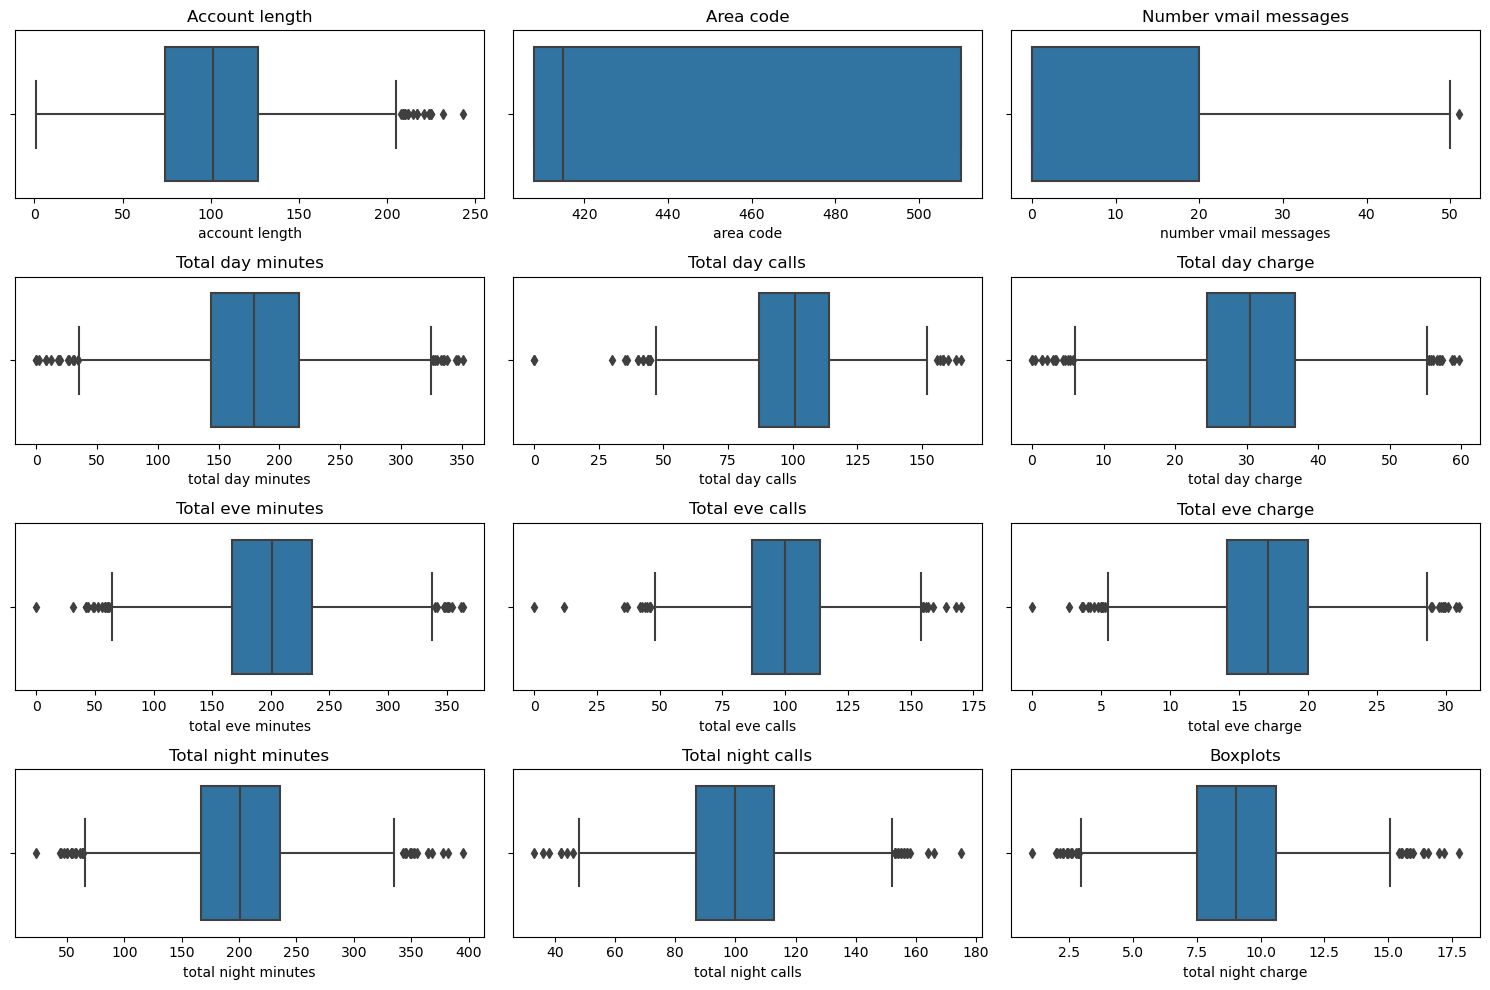

In [7]:
plt.figure(figsize=(15, 10))
for n, column in enumerate(columns_int, 1):
    if n <= 12:  # Limit to 12 subplots
        plt.subplot(4, 3, n)
        sns.boxplot(x=df[column])
        plt.title(f'{column.capitalize()}')
        plt.xlabel(column)
plt.title('Boxplots')
plt.tight_layout()
plt.show()


>Examining the boxplots reveals the presence of outliers. However, it's essential not to remove them hastily. I need to carefully investigate these outliers to understand their impact on the dataset.

In [18]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Examining the boxplots reveals several outliers across different variables, indicating potential data anomalies or extreme usage patterns. However, it's crucial not to remove these outliers blindly. Let's carefully investigate each variable to understand its context and impact on the dataset.

>- Account Length: The maximum value of 243 seems plausible, as it represents the number of days a customer has been with the service provider. 
International Plan and Voice Mail Plan: These variables seem to be binary (0 or 1), and the minimum and maximum values of 0 and 1 are expected and realistic.

>- Number of Voice Mail Messages: The maximum value of 51 seems plausible, as some customers may receive a large number of voice mail messages. However, without additional context, it's difficult to assess its realism.

>- Total Day, Evening, and Night Minutes: The maximum values for these variables (350.8, 363.7, and 395.0, respectively) are within the plausible range for minutes of usage, especially for heavy users or during exceptional circumstances. However, it's essential to verify if these values align with typical usage patterns in the dataset.

>- Total Day, Evening, and Night Calls: The maximum values of 165, 170, and 175, respectively, seem high but could be realistic during peak usage times or for customers with specific needs. Again, it's important to validate these values based on the context of the data.

>- Total Day, Evening, and Night Charge: The maximum values for charges seem reasonable given the corresponding maximum minutes of usage.

>- Total International Minutes, Calls, and Charges: The maximum values appear plausible but may require further validation based on international calling patterns and associated charges.

>- Customer Service Calls: The maximum value of 9 for the number of customer service calls is relatively high but could occur for customers experiencing multiple issues or requiring extensive support. However, it's essential to verify if such occurrences are common in the dataset.

Upon detailed outlier examination, I've chosen not to remove them outright. Rather, outliers in call-related columns (Total Day, Evening, and Night Calls) exceeding their maximum values will be trimmed as unusual. High charges, possibly due to call volume, will be retained.

#### A function To remove Outliers

In [8]:
# Using IQR method to remove outliers
def remove_outl(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    return df[(df[column] >= lb) & (df[column] <= ub)]

columns_int = df[['total day calls','total eve calls','total night calls','total intl calls']]
for col in  columns_int:
    df = remove_outl(df,col)
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### Boxplots After REmoval Of outliers

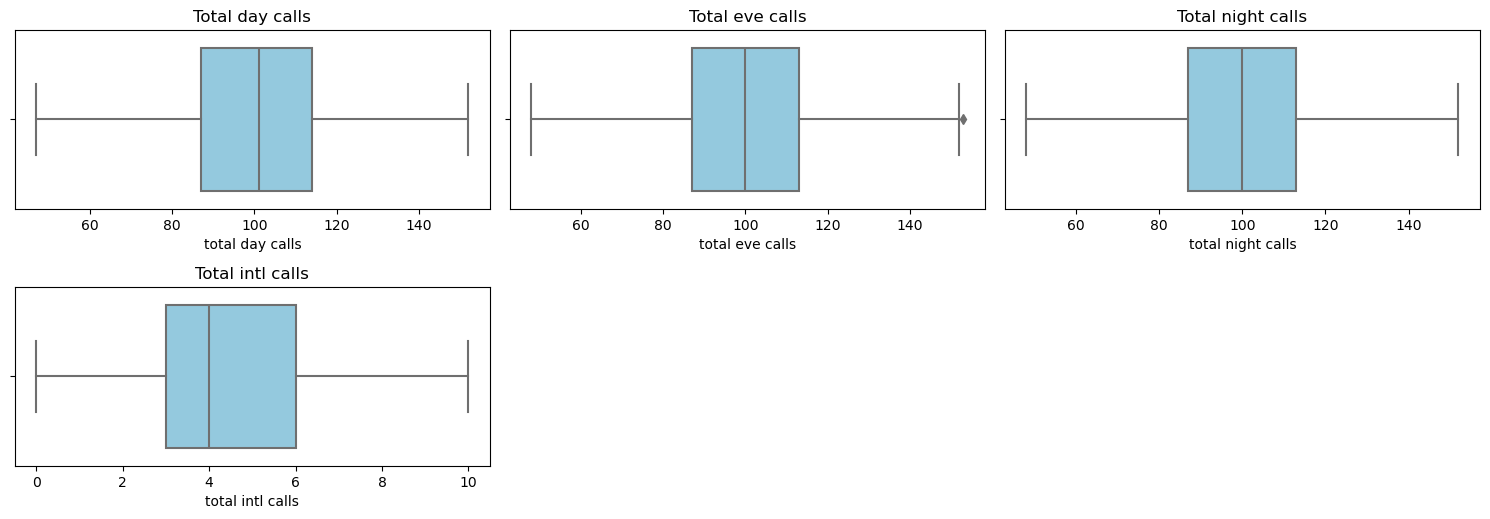

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_int, 1):
    if i <= 12:  # Limit to 12 subplots
        plt.subplot(4, 3, i)
        sns.boxplot(x=df[col],color = 'skyblue')
        plt.title(f'{col.capitalize()}')
        plt.xlabel(col)

plt.tight_layout()
plt.show()

### Explanatory Data Analysis

#### Univariate Data Analysis

##### Histograms

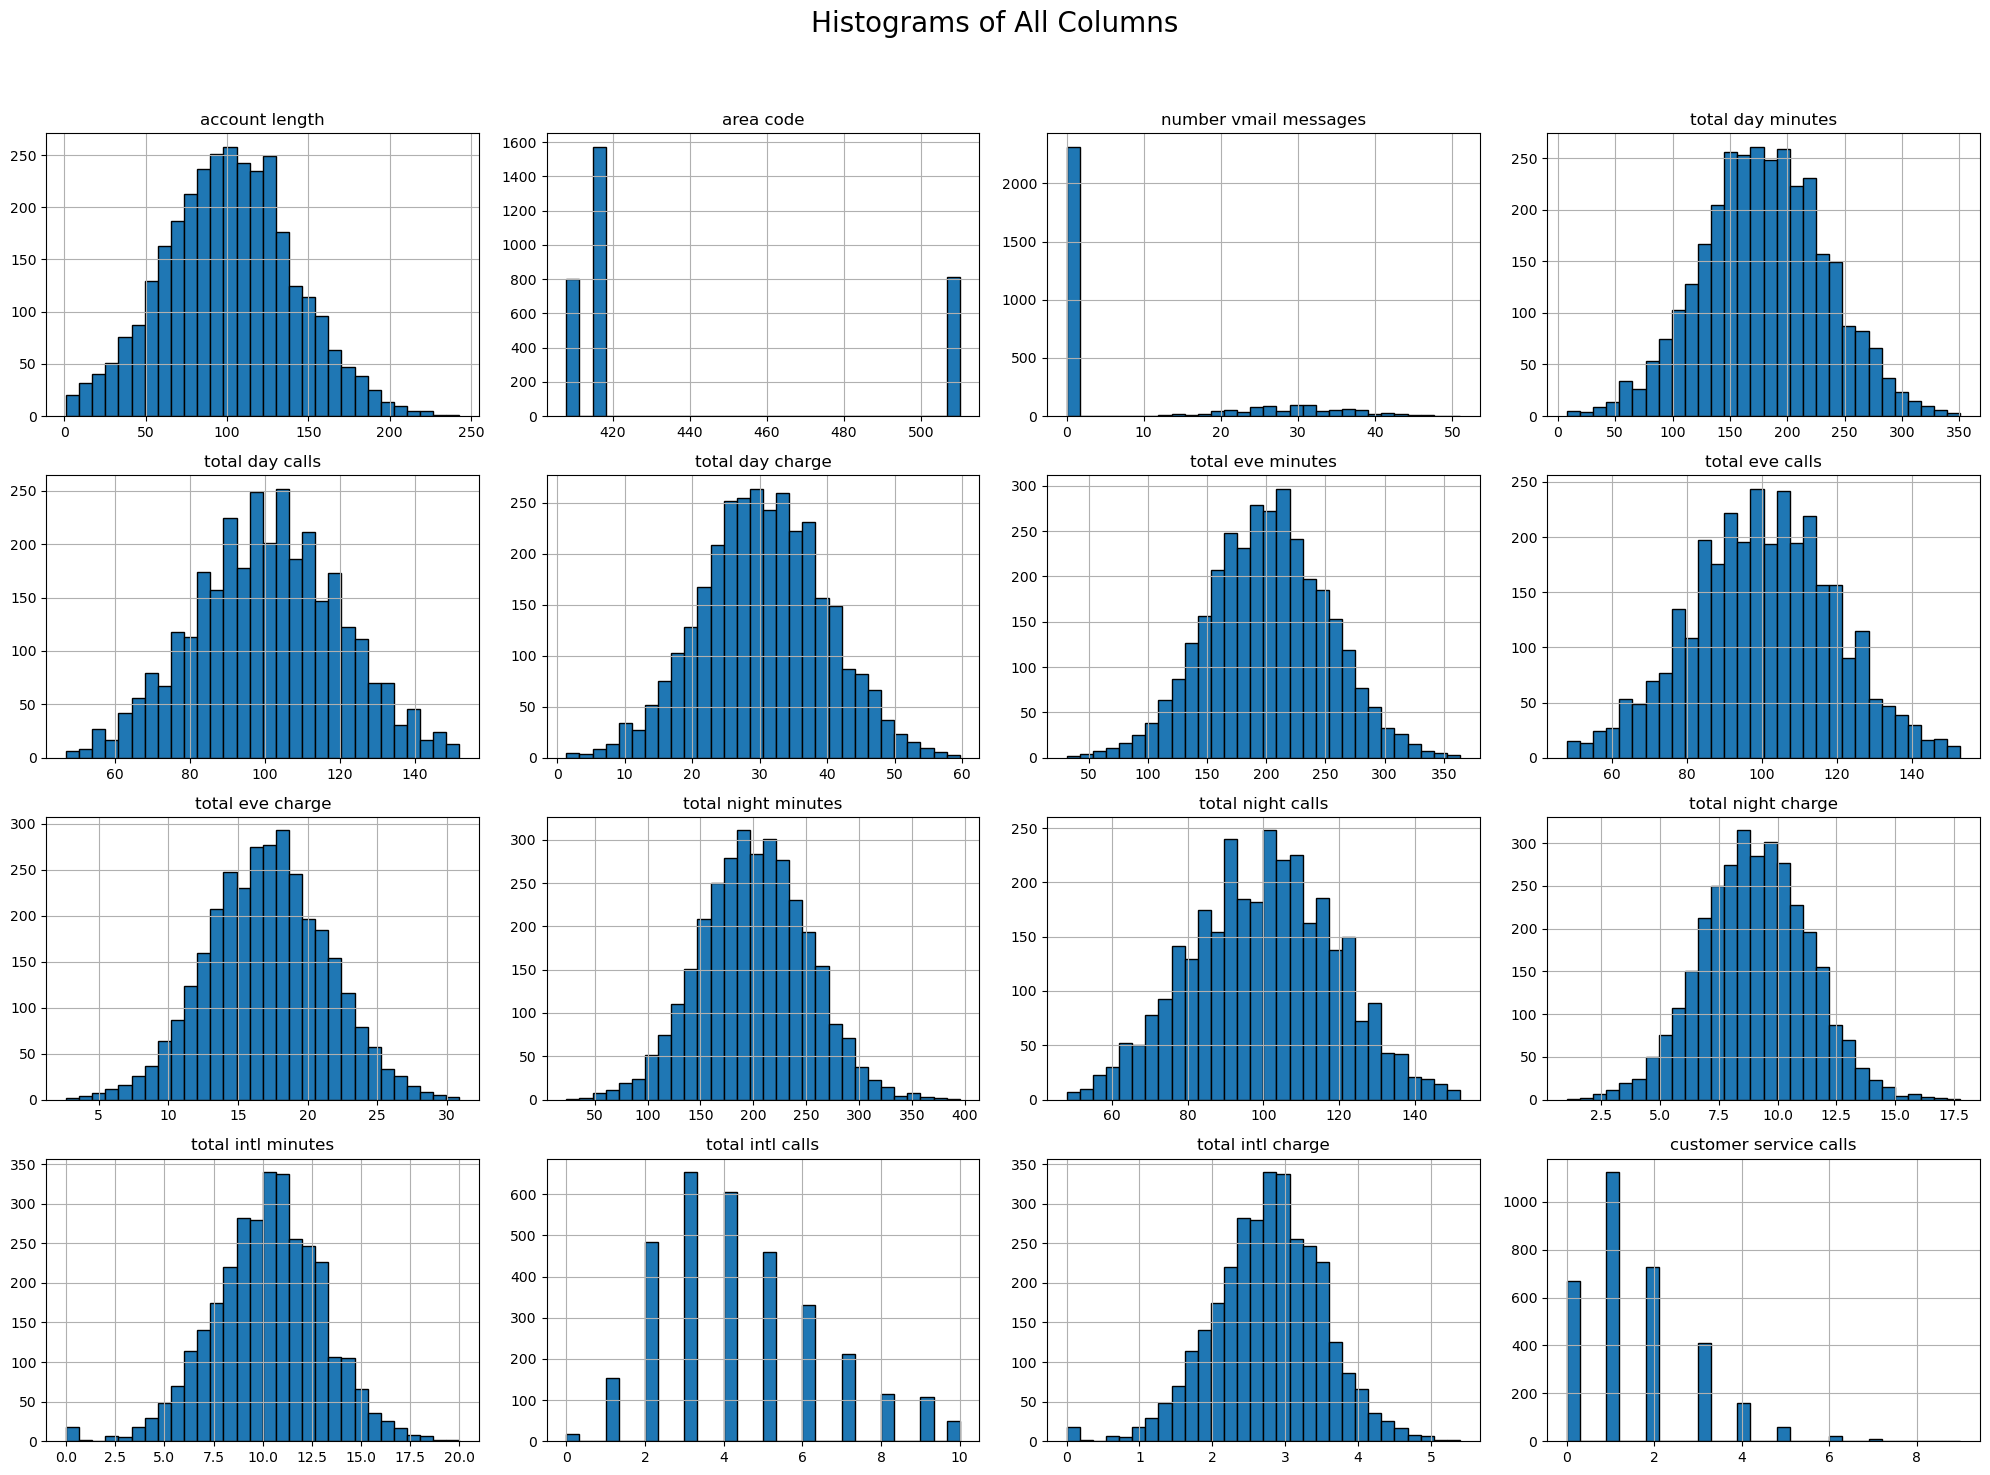

In [11]:
# Create histograms for each column
df.hist(figsize=(20, 15), bins=30, edgecolor='black', color='#1f77b4')
plt.suptitle('Histograms of All Columns', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


>`number of vmail messages`,`total day minutes`,`total day calls`, `total day charge`,`total eve minutes`,`total eve calls`,`total eve charge`,`total night minutes`, `total night calls`, `total night charge`,`total intl minutes`,`total intl charge` columns have a normal distribution their histograms have a bell-shaped curve, with most data points clustering around the mean and fewer data points as you move away from the mean.

>Histograms for `international plan` and `voice mail plan` shows two distinct bars representing the values 0 and 1. The distribution confirms that these variables are binary as expected, with both categories represented in the dataset.

>`Customer service calls` has a few peaks, which indicates there are a few modes in the population. This makes sense because `customer service calls` has to be a integer and not a float number.The histogram displays four bars: 642 customers made no calls, 1067 made one, 705 made two, and 400 made three. It illustrates varying levels of customer service interaction.

#### Checking Skewness

In [22]:
# Checking for skewness for different columns in my dataset
numeric_columns = df[['account length','number vmail messages','total day minutes','total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes','total intl charge']]

In [23]:
skewness = columns_int.skew()

print("Skewness of different columns in the churn dataset:")
print(skewness)


Skewness of different columns in the churn dataset:
total day calls     -0.111787
total eve calls     -0.055563
total night calls    0.032500
total intl calls     1.321478
dtype: float64


Most features exhibit little to no skewness, indicating relatively symmetric distributions, except for the number of ` total intl minutes` and `number vmail messages` and ` total intl charge `, which show moderate skewness towards higher and lower values, respectively

#### Churn Distribution

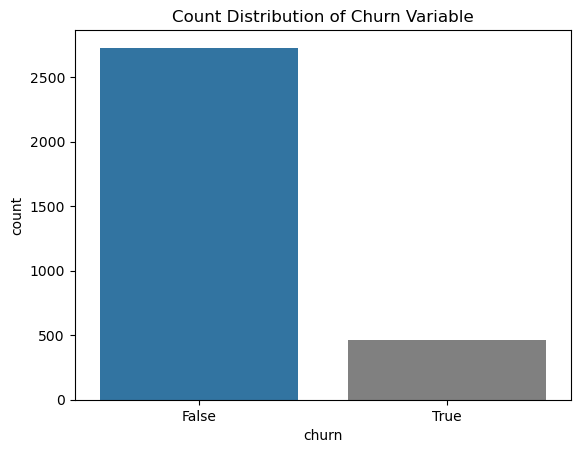

In [24]:
# Plotting the distribution of the churn variable
  
ax = sns.countplot(data=df, x='churn', palette=['#1f77b4', 'grey'])
ax.set_title('Count Distribution of Churn Variable')
plt.show()

churn
False    2727
True      462
Name: count, dtype: int64


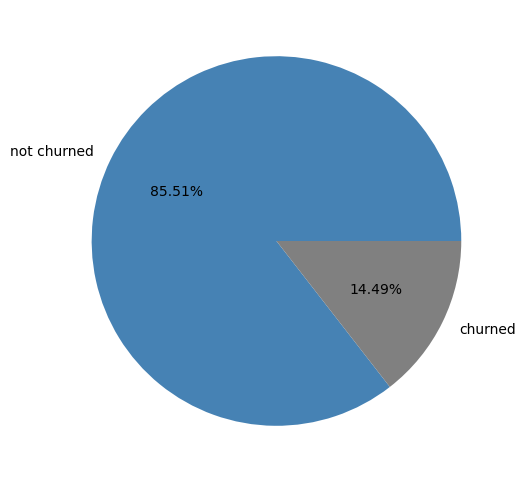

In [25]:
##Visualize the percentage of the customers who churned and the customers who did not churn
print(df['churn'].value_counts())
labels='not churned','churned'
fig, ax = plt.subplots(figsize=(6,6))
colors=["steelblue","grey"]
ax.pie(df['churn'].value_counts(), labels=labels, autopct='%1.2f%%',colors=colors)
plt.show()

The above plots shows class imbalance with customers who have not churned at 85.51% and those who have churned at 14.49%.This imbalance could impact the performance of machine learning models, as they may tend to favor the majority class and struggle to accurately predict the minority class. Strategies such as resampling techniques (oversampling of the minority class or undersampling of the majority class), using appropriate evaluation metrics (such as precision, recall, and F1-score), or employing ensemble methods can help mitigate the effects of class imbalance and improve model performance.








#### Bivariate analysis

##### Boxplots

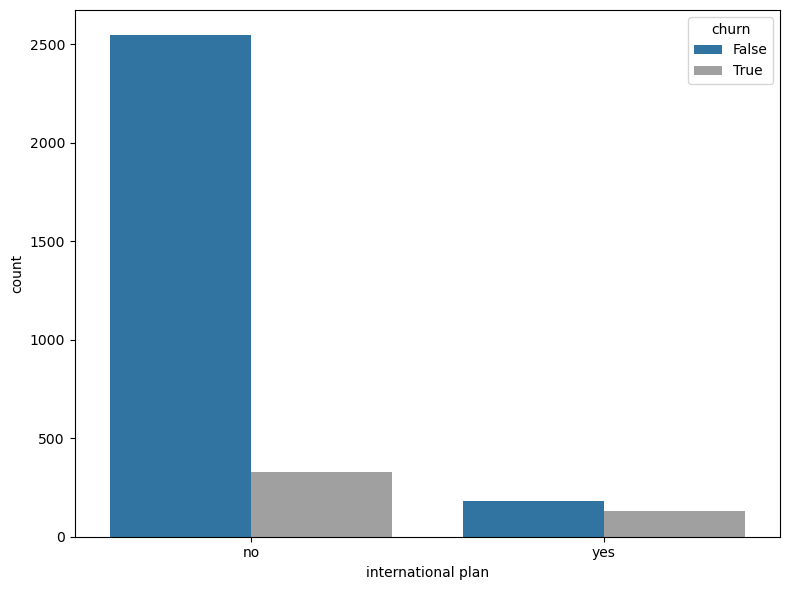

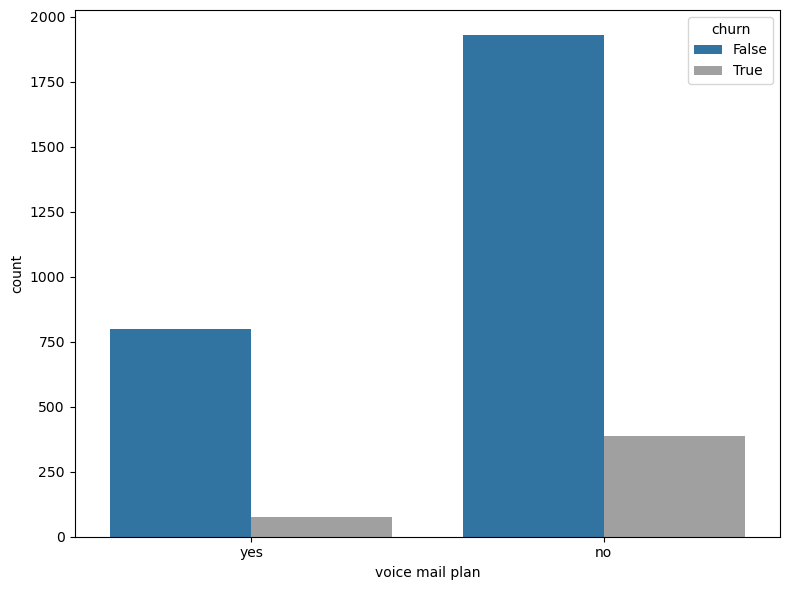

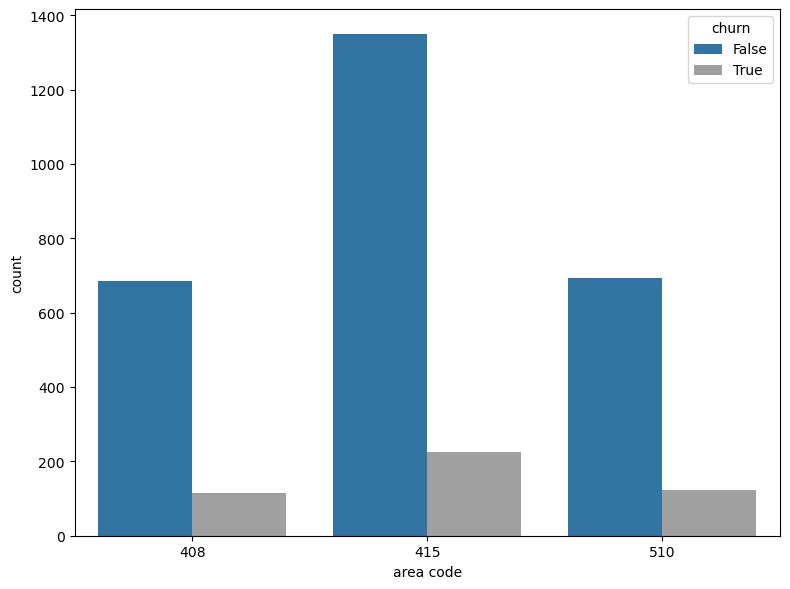

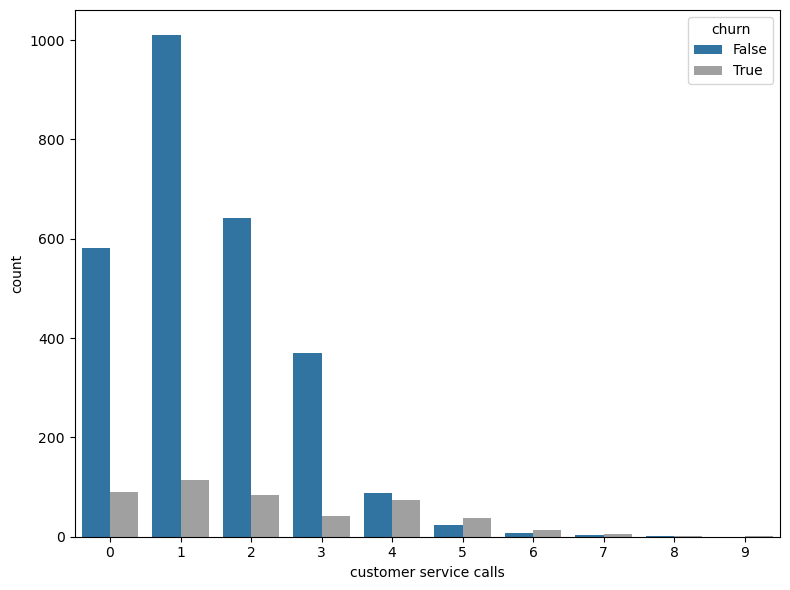

In [26]:
def bivariate_analysis(df, col, hue, pal):
    """
    This function takes in a whole dataframe df and specifies an argument
    column for which the countplot would be plotted.
    palette is a list of colors representing the hue category

    """
    # Convert hue column to string type
    df[hue] = df[hue].astype(str)
    
    # figure size
    plt.figure(figsize=(8, 6))

    # Plot countplot for the categorical variable
    sns.countplot(x=col, hue=hue, data=df, palette=pal)
    
    # Adjust layout
    plt.tight_layout();
     

 
columns_to_plot = ['international plan', 'voice mail plan', 'area code', 'customer service calls']
hue_col = 'churn'
palettes = ['#1f77b4', '#a0a0a0']   

for column in columns_to_plot:
     bivariate_analysis(df, column, hue_col,palettes)



In [27]:
df['churn'].value_counts()

churn
False    2727
True      462
Name: count, dtype: int64

- For the first countplot Customers with no international plan churn more than customers with an international plan even though it seems some customers 
  with an international plan still churn away from the company
- For the second countplot Customers with no voice mail  plan churn more than customers with a voice mail plan

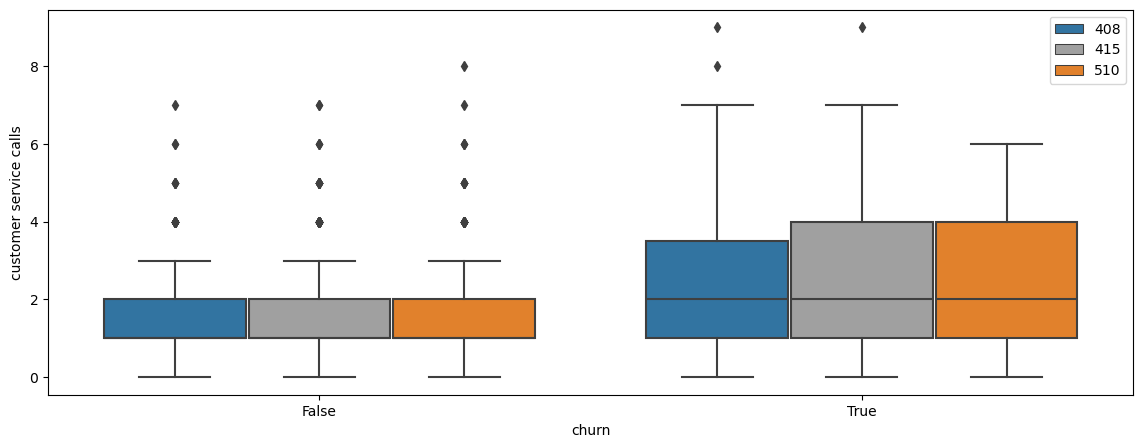

In [28]:
# Define the color palette
colors_palette = ['#1f77b4', '#a0a0a0', '#ff7f0e']  # blue, grey, and orange

# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code', palette=colors_palette)
plt.legend(loc='upper right')
plt.show()


>There are outliers, in all area codes, amongst the customers who have not churned away from the SyriaTel Telecommunication Company.
>customers who churned away from the company, they more likely have a 415 or a 510 area code.

### Feature Engineering

Create new columns `total calls` and `total minutes`. In the new `total calls` I will not include `customer service calls` but  I will also create another column where I will  add the `customer service calls` then I will check model performance with the different columns

In [29]:
df['total calls_incl_cs'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'] + df['customer service calls']
df['total calls_excl_cs'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'] 
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

print(df['total calls_excl_cs'].describe(), df['total minutes'].describe(), sep='\n\n')

count    3189.000000
mean      304.807150
std        33.495849
min       191.000000
25%       282.000000
50%       305.000000
75%       327.000000
max       408.000000
Name: total calls_excl_cs, dtype: float64

count    3189.000000
mean      592.227689
std        89.728915
min       284.300000
25%       532.100000
50%       593.600000
75%       652.600000
max       885.000000
Name: total minutes, dtype: float64


#### Checking for correlation

In [30]:
# Create numeric & categorical lists from numeric and categorical columns respectively
numer_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','total calls_incl_cs','total calls_excl_cs','total minutes']
categ_cols = ['state','area code','international plan','voice mail plan']

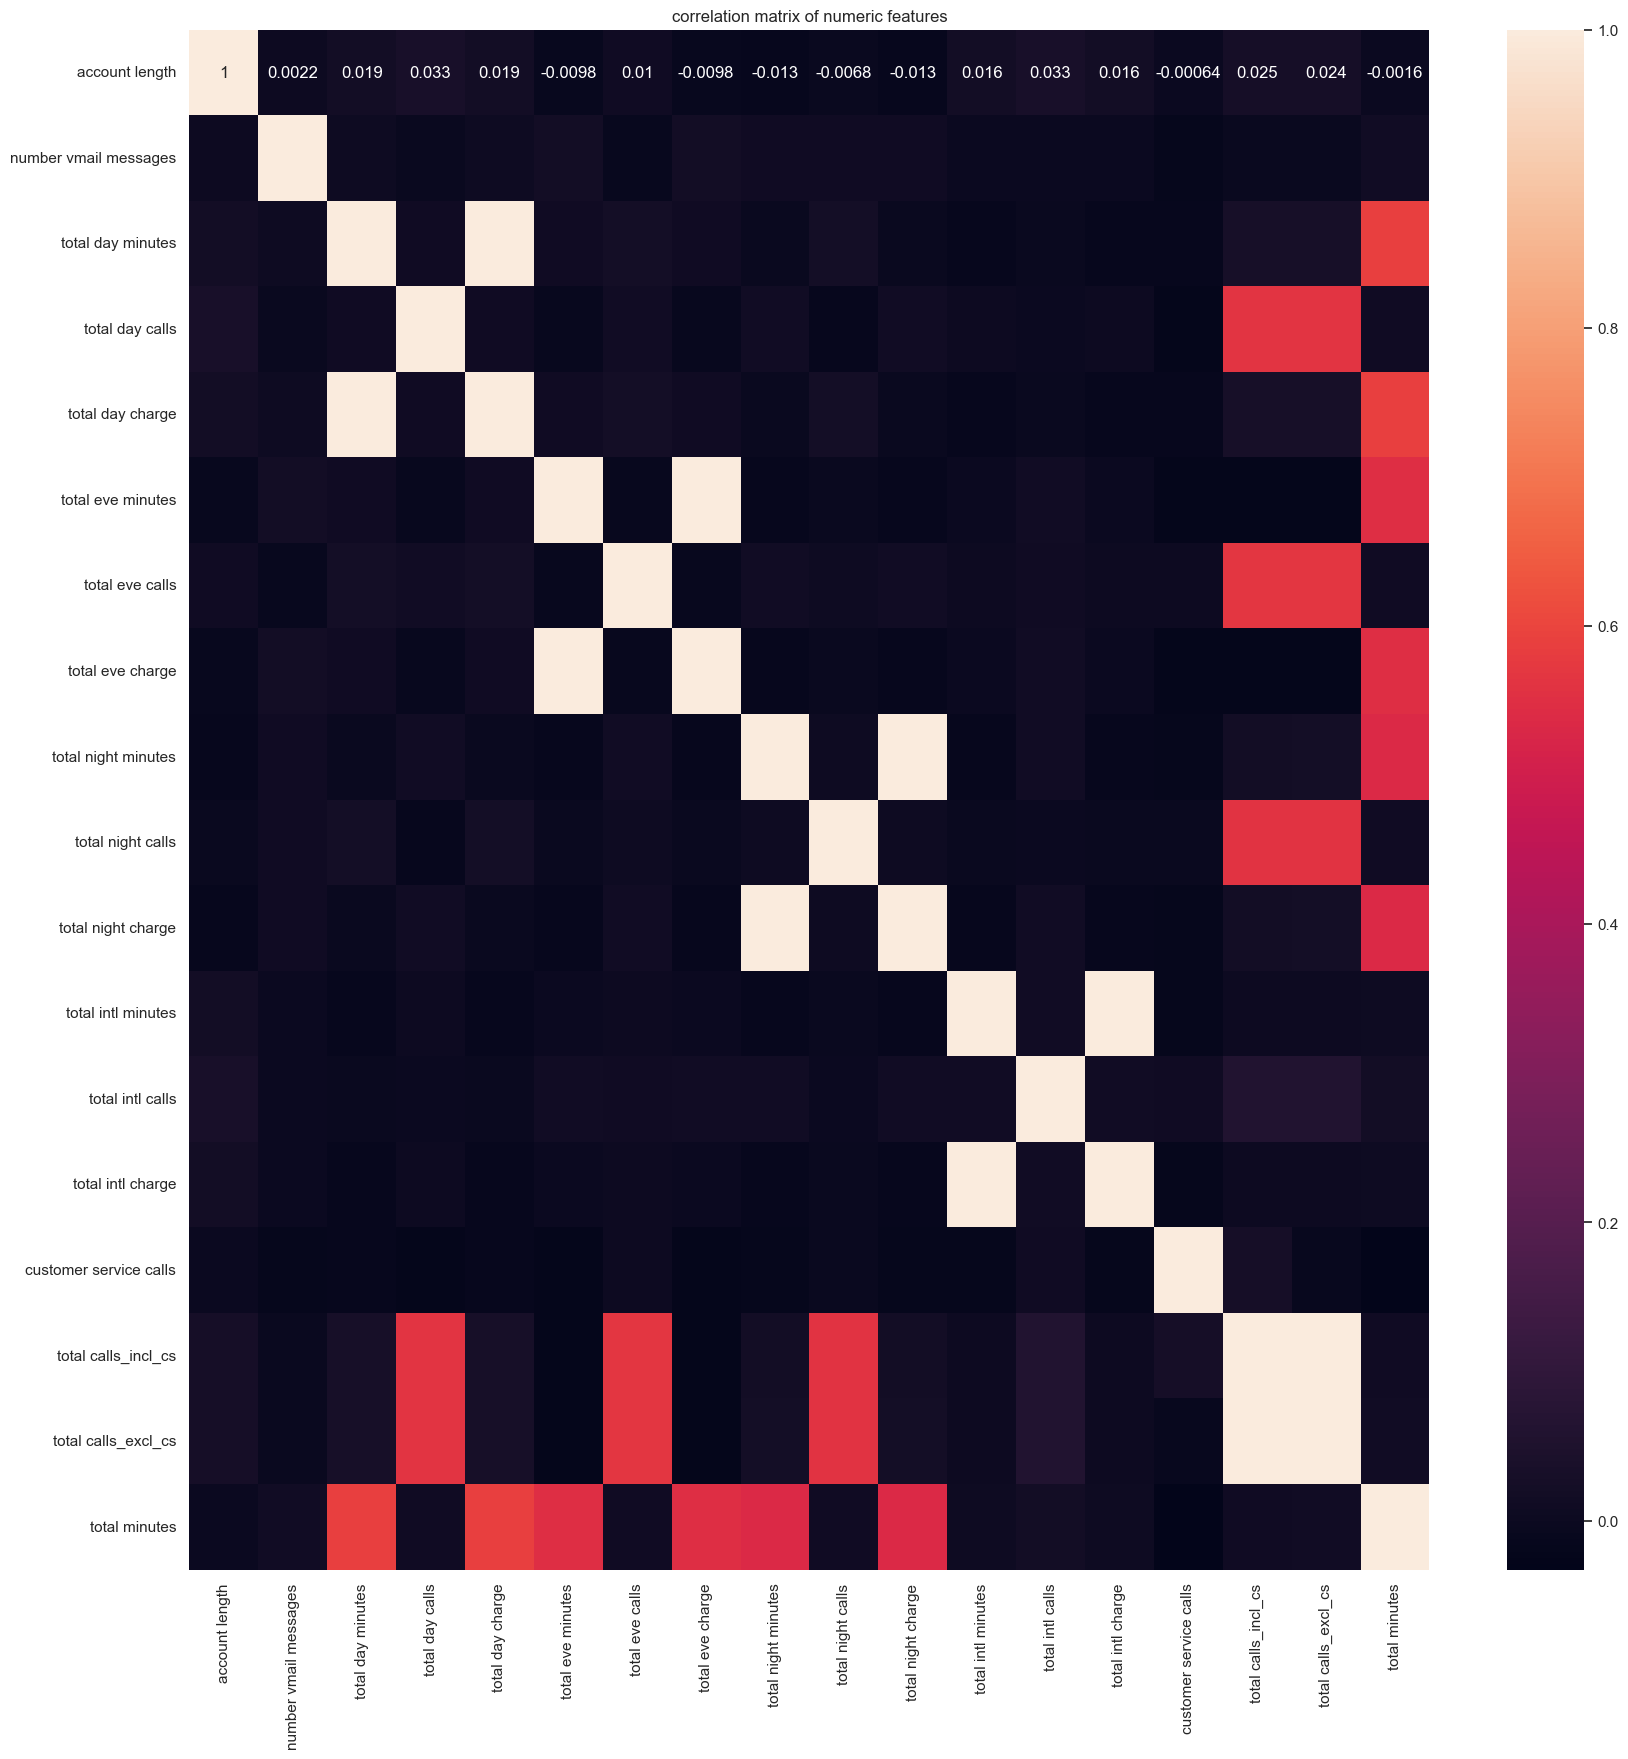

In [31]:
# numeric features
cr = df[numer_cols].corr(method='spearman') # calculate correlation matrice

plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(cr, annot=True).set(title='correlation matrix of numeric features');

>The heatmap clearly shows that some features are highly correlated with each other. This multicollinearity can affect model performance and should be addressed accordingly.

>- Most of the features are not correlated however some do share a perfect correlation.
>- `Total day charge` and `total day minutes` features are fully positively correlated.
>- `Total eve charge` and `total eve minutes` features are fully positively correlated.
>- `Total night charge` and `total night minutes` features are fully positively correlated.
>- `Total intl charge` and `total intl minutes` features are fully positively correlated.
>- Minutes and charges have are perfectly correlated to each because charge is a direct result of the minutes used
>High correlation between features in a dataset leads To multicollinearity which greatly affects models

#### Checking for Multicollinearity

A correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation.I can set by cut-off threshold as 0.75

In [32]:
abs(df[numer_cols].corr()) > 0.75

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total calls_incl_cs,total calls_excl_cs,total minutes
account length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
number vmail messages,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total day minutes,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
total day calls,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
total day charge,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
total eve minutes,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
total eve calls,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
total eve charge,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
total night minutes,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
total night calls,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Where the boolean value is `True` it means there is multicollinearity

In [33]:
colli_df=df[numer_cols].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
colli_df['pairs'] = list(zip(colli_df.level_0, colli_df.level_1))

# set index to pairs
colli_df.set_index(['pairs'], inplace = True)

#d rop level columns
colli_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
colli_df.columns = ['cc']

 

In [34]:
colli_df[(colli_df.cc>.75) & (colli_df.cc <1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total day minutes, total day charge)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993
"(total intl charge, total intl minutes)",0.999993
"(total calls_excl_cs, total calls_incl_cs)",0.999225


##### Convert Churn To 0s and 1s

Convert 'Churn' to 0 for False, 1 for True. Check feature correlations with 'Churn'. Address multicollinearity by comparing feature correlations and relevance to 'Churn'.

In [35]:
ler = LabelEncoder()

# Encode the 'churn' column
df['churn'] = ler.fit_transform(df['churn'])

# Drop the original 'churn' column if needed
# df.drop('churn', axis=1, inplace=True)
df['churn'].value_counts()

churn
0    2727
1     462
Name: count, dtype: int64

This shows class imbalance

##### Drop Features That are Multicollinearated with each other

In [36]:
df.drop(columns = ['total day charge','total eve charge','total night charge','total intl charge', 'total calls_excl_cs'],inplace = True)

### modelling

Train_test_split

In [37]:
# Assignig churn to `y` as the target variable and all the other features to `X` as the indepenent variables
y = df['churn']
X = df.drop(columns ='churn',axis = 1)

In [38]:
# Splitting the data into X_train,X_test,y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [39]:
# Printing out the shape of x_train,y_train,X_test, y_test
print('X_train_shape',X_train.shape)
print('=' * 24)
print('X_test_shape',X_test.shape)
print('=' * 24)
print('y_train_shape',y_train.shape)
print('=' * 24)
print('y_test_shape',y_test.shape)
print('=' * 24)

X_train_shape (2551, 16)
X_test_shape (638, 16)
y_train_shape (2551,)
y_test_shape (638,)


Preprocessing

In [40]:
# acaolumns to label encode
cat_cols = ['international plan', 'voice mail plan']

# instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform each categorical column in the training set
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])

# Transform each categorical column in the test set
for col in cat_cols:
    X_test[col] = le.transform(X_test[col])



#### Scaling

Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
In our example, scaling using Standard Scaler method is applied. 
Scaling is applied on the columns which is defined in "numeric_cols" variable below.

In [41]:
numer_cols = ['account length','number vmail messages','total day minutes','total day calls', 
                'total eve minutes','total eve calls' ,'total night minutes','total night calls',
                'total intl minutes','total intl calls','customer service calls','total calls_incl_cs','total minutes']

In [42]:
scaler = StandardScaler()
# Fit and transform the numeric columns in the training set
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numer_cols]),
    index=X_train.index,
    columns=numer_cols
)
# Transform the numeric columns in the test set using the saler use for training
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numer_cols]),
    index=X_test.index,
    columns=numer_cols
)



In [43]:
# Concatenate the encoded categorical variables and scaled variables
X_train= pd.concat([X_train_scaled, X_train[cat_cols]], axis=1)
X_test= pd.concat([X_test_scaled, X_test[cat_cols]], axis=1)

**Models that am going to use:**
- Logistic regression model as my baseline model
- KNearest Model
- Decison tree model
- Random forest model
- Xgoost model

**Ways am going to improve my models**

- Smote
- Feature Selection using methods such as Recursive Feature  Elimination (RFE) or feature importance 
- Ensemble methods eg.XGBoost
- Crossvalidation
- Hyperparameter Tuning
  


#### Logistic Regression Model

Instantiate LogisticRegression
>- Make sure you don't include the intercept
>- set C to a very large number such as 1e12
>- Use the `liblinear` solver

Fit the model to the training data

In [44]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Predict
Generate predictions for the training and test sets.

In [45]:
# Generate predictions
y_predict_train = logreg.predict(X_train)
y_predict_test = logreg.predict(X_test)
# How many times was the classifier correct on the training set?
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_predict_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 194 correct, ~ 85% accuracy
# How many times was the classifier correct on the training set?
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_predict_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 62 correct, ~ 82% accuracy

churn
0    2208
1     343
Name: count, dtype: int64
------------------------------------
churn
0    0.865543
1    0.134457
Name: proportion, dtype: float64
churn
0    539
1     99
Name: count, dtype: int64
------------------------------------
churn
0    0.844828
1    0.155172
Name: proportion, dtype: float64


In [46]:
 # Calculate accuracy
accuracy_result = accuracy_score(y_test, y_predict_test )
print("Accuracy:", accuracy_result)

# Calculate precision
precision_result = precision_score(y_test, y_predict_test )
print("Precision:", precision_result)

# Generate classification report
report_result = classification_report(y_test, y_predict_test )
print("Classification Report:")
print(report_result)

 

Accuracy: 0.8448275862068966
Precision: 0.6060606060606061
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       532
           1       0.61      0.19      0.29       106

    accuracy                           0.84       638
   macro avg       0.73      0.58      0.60       638
weighted avg       0.82      0.84      0.81       638



- My baseline model has a high accuracy 84%, which  I know is misleading because I have class imbalance in my dataset 
- The precision for class 1 is quite okay, but the recall (0.19) is very low, indicating that the model is not effectively   identifying class 1 instances.
- The f1 score is also low  
 

#### A function To display Confusion matrix

In [47]:
 def confusion_matrix(y_true, y_pred, classes=None):
    """
    Plot a confusion matrix.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
         
    """
    # Calculation of the confusion matrix
    cnfm= confusion_matrix(y_true, y_pred)
    
    # Get class labels
    if classes is None:
        classes = sorted(set(y_true) | set(y_pred))
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cnfm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

 


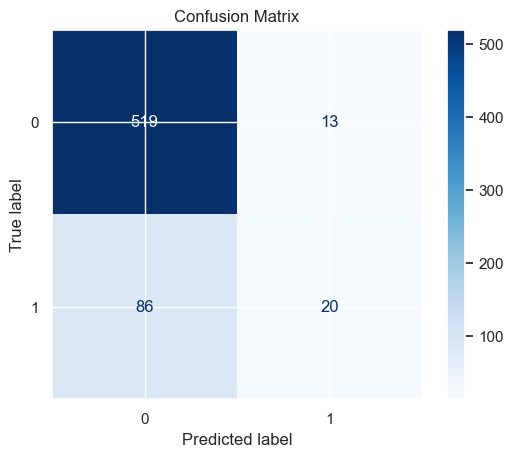

In [48]:
confusion_matrix(y_test, y_predict_test)
 

- True Negatives : 5i9 instances were correctly classified as class 0.
- False Positives : 13 instances were incorrectly classified as class 1 when they were actually class 0.
- False Negatives : 86 instances were incorrectly classified as class 0 when they were actually class 1.
- True Positives : 20 instances were correctly classified as class 1.

### KNN

In [49]:
# Instantiate knn model classifier
knn =  KNeighborsClassifier()
# Train the KNN model
knn.fit(X_train, y_train)
       # Make predictions on the test set
y_pred = knn.predict(X_test)
        # Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Classification Report:")
print(report)

Accuracy: 0.8667711598746082
Precision: 0.7837837837837838
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       532
           1       0.78      0.27      0.41       106

    accuracy                           0.87       638
   macro avg       0.83      0.63      0.67       638
weighted avg       0.86      0.87      0.84       638



- My KNN model has a high accuracy 86.67% which is an increment from the previous logistic regression which  may be a little bit misleading because I have class imbalance in my dataset 
- The precision for class 1 is quite okay, but the recall (0.27) is very low, indicating that the model is not effectively   identifying class 1 instances though the recall has increased when its compared to the previous recall of the logistic regression model
- The f1 score is of the class 1 has also ncreased

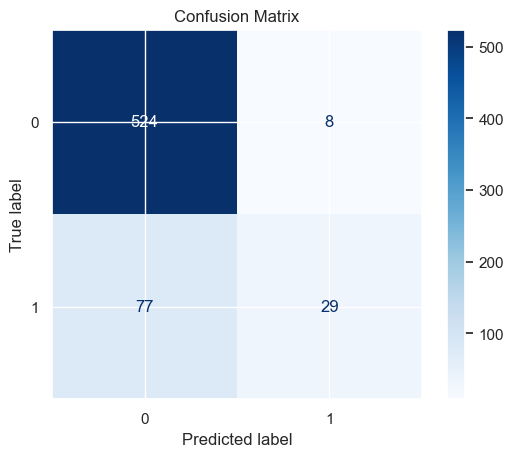

In [50]:
confusion_matrix(y_test, y_pred)


- True Negatives (TN): 524 instances were correctly classified as class 0.
- False Positives (FP): 8 instances were incorrectly classified as class 1 when they were actually class 0.
- False Negatives (FN): 77 instances were incorrectly classified as class 0 when they were actually class 1.
- True Positives (TP): 29 instances were correctly classified as class 1.

### Decison Tree Model

Accuracy: 0.9090909090909091
Precision: 0.7264150943396226
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       532
           1       0.73      0.73      0.73       106

    accuracy                           0.91       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.91      0.91      0.91       638



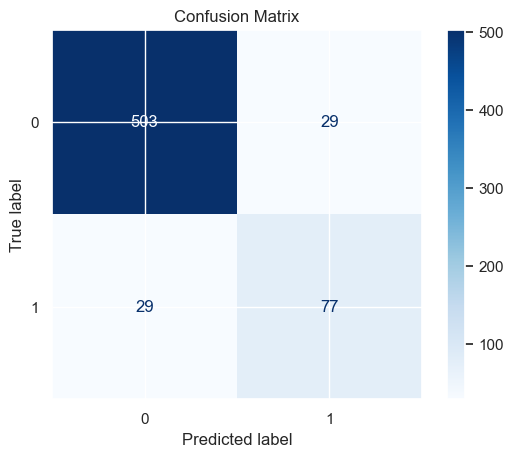

In [51]:
# Instatiate Decision Tree classifier
dtc = DecisionTreeClassifier()

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Classification Report:")
print(report)
confusion_matrix(y_test, y_pred, classes=dtc.classes_)

- Decision Tree Regressor model has a high accuracy 91%, which is also an improvement when its compared to the previous models I know is misleading because I have class imbalance in my dataset 
- The precision for class 1 is quite okay, the recall has also increased, now its at 73% which is a good improvement. But I will have to sought the issue of class imbalance to see how my models will improve
 

### Random Tree Classifier Model

Accuracy: 0.9420062695924765
Precision: 0.948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       532
           1       0.95      0.69      0.80       106

    accuracy                           0.94       638
   macro avg       0.94      0.84      0.88       638
weighted avg       0.94      0.94      0.94       638



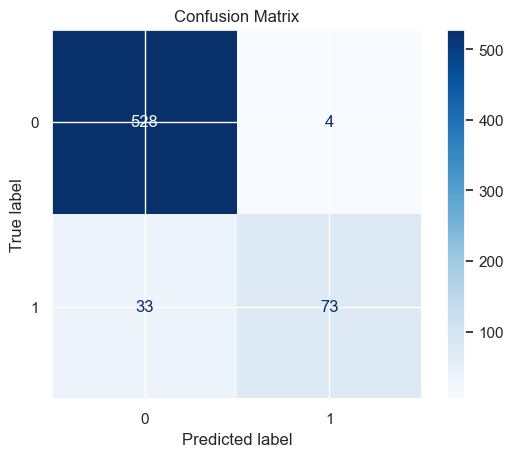

In [52]:
# instantiate random classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random classifier on the train set
rfc.fit(X_train, y_train)

# predictions on the test data
y_pred =  rfc.predict(X_test)

# Evaluatation of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Classification Report:")
print(report)
confusion_matrix(y_test, y_pred, classes=dtc.classes_)
 

- Random forest classifiermodel has a high accuracy     94.2%, which is is performing so well compared to the other previous models. I know it is misleading because I have class imbalance in my dataset 
- The precision for class 1 is quite okay, the recall value is also good at (0.69) though when I compare to the previous Decision tree model it has reduced

In [53]:
y_test

1084    0
1054    0
825     0
433     0
1164    0
       ..
2738    0
731     0
2571    0
3160    0
1430    0
Name: churn, Length: 638, dtype: int32

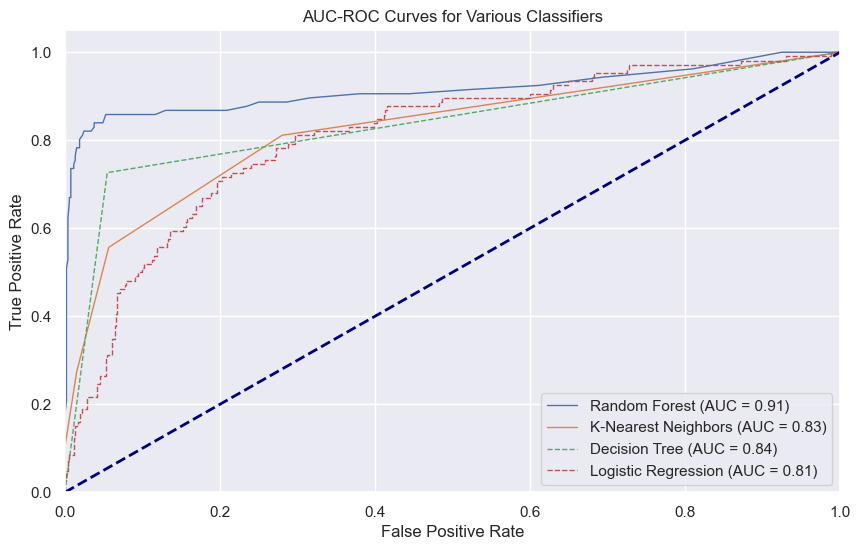

In [54]:
# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)
y_pred_prob_rfc = rfc.predict_proba(X_test)

# AUC-ROC curve for Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc[:, 1])
roc_auc_rfc = roc_auc_score(y_test, y_pred_prob_rfc[:, 1])

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)

# AUC-ROC curve for K nearest neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn[:, 1])

# Make predictions on the test data
y_pred_dtc = dtc.predict(X_test)
y_pred_prob_dtc = dtc.predict_proba(X_test)

# AUC-ROC curve for Decision Tree
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_prob_dtc[:, 1])
roc_auc_dtc = roc_auc_score(y_test, y_pred_prob_dtc[:, 1])

# Make predictions on the test data
y_pred_log = logreg.predict(X_test)
y_pred_prob_log = logreg.predict_proba(X_test)

# AUC-ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log[:, 1])
roc_auc_log = roc_auc_score(y_test, y_pred_prob_log[:, 1])

# AUC-ROC curves for the four models
plt.figure(figsize=(10, 6))

# Random Forest
plt.plot(fpr_rfc, tpr_rfc, lw=1, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

# K-Nearest Neighbors
plt.plot(fpr_knn, tpr_knn, lw=1, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Decision Tree
plt.plot(fpr_dtc, tpr_dtc, lw=1, linestyle='--', label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')

# Logistic Regression
plt.plot(fpr_log, tpr_log, lw=1, linestyle='--', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Various Classifiers')
plt.legend(loc="lower right")
plt.show()


The best performing model according to the AUC-ROC curve is the Random Forest Classifier with an AUC of 91%.But I have do Solve the issue of class imbalance so that performance of my models may improve

### Models with Smote and Hyperparameters Tuning

Smote
I will Intergrate grid search, so that I can tune several hyperparameters in each of the machine learning models and also to avoid data leakage

#### Grid Search for Logistic Regression

In [55]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [56]:
# grid search for logistic regression.
lr = LogisticRegression(random_state=12345)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [ 100, 200, 300 ]

param = {'solver': solver, 'max_iter': max_iter}

grid_search = GridSearchCV(lr, param, cv=5, scoring='f1')

grid_search.fit(X_train_smote, y_train_smote)

print("best_lr_model:", grid_search.best_estimator_)

best_lr_model: LogisticRegression(random_state=12345, solver='newton-cg')


The best hyperparameters for the logistic regression is the hyperparameter random state of 12345 and solver = 'newton-cg'

In [57]:
# Ran optimized logistic regression with SMOTE.
lrg_smote = LogisticRegression(max_iter=1000, random_state=12345, solver='newton-cg')

lrg_smote_scores = cross_val_score(lrg_smote, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

lrg_smote.fit(X_train_smote, y_train_smote)

lr_smote_predict_train = cross_val_predict(lrg_smote, X_train_smote, y_train_smote, cv=5)
lr_smote_predict_test = cross_val_predict(lrg_smote, X_test, y_test, cv=5)

print("lr_smote_f1_train:", f1_score(y_train_smote,lr_smote_predict_train))
print("lr_smote_f1_test:", f1_score(y_test,lr_smote_predict_test))
print("lr_smote_accuracy_train:", accuracy_score(y_train_smote,lr_smote_predict_train))
print("lr_smote_accuracy_test:", accuracy_score(y_test,lr_smote_predict_test))
print("lr_smote_mean_accuracy:", lrg_smote_scores.mean())

lr_smote_f1_train: 0.7404042698160345
lr_smote_f1_test: 0.28767123287671237
lr_smote_accuracy_train: 0.7396355353075171
lr_smote_accuracy_test: 0.8369905956112853
lr_smote_mean_accuracy: 0.739635535307517


#### Model Evaluation


The logistic Regression model performs well on the training data but fails to generalize well to the test data, that is  in predicting the minority class (churners). The low F1 score on the test set highlights that the model's recall and precision are not balanced when predicting churn, despite high accuracy. So I will work on the second model that is the Knn model with a solved class imbalance to see how the modedl is going to perform.

In [58]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid with the necessary hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Perform grid search
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_knn.fit(X_train_smote, y_train_smote)

# Print the best estimator found by GridSearchCV
print("best_knn_model:", grid_search_knn.best_estimator_)


best_knn_model: KNeighborsClassifier(n_neighbors=3, weights='distance')


In [59]:
# logistic regression with SMOTE.
knn_smote = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_smote_scores = cross_val_score(knn_smote, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

knn_smote.fit(X_train_smote, y_train_smote)

knn_smote_predict_train = cross_val_predict(knn_smote, X_train_smote, y_train_smote, cv=20)
knn_smote_predict_test = cross_val_predict(knn_smote, X_test, y_test, cv=5)

print("knn_smote_f1_train:", f1_score(y_train_smote,knn_smote_predict_train))
print("knn_smote_f1_test:", f1_score(y_test,knn_smote_predict_test))
print("knn_smote_accuracy_train:", accuracy_score(y_train_smote,knn_smote_predict_train))
print("knn_smote_accuracy_test:", accuracy_score(y_test,knn_smote_predict_test))
print("knn_smote_mean_accuracy:", knn_smote_scores.mean())

knn_smote_f1_train: 0.9225915018931425
knn_smote_f1_test: 0.34285714285714286
knn_smote_accuracy_train: 0.9161731207289294
knn_smote_accuracy_test: 0.8557993730407524
knn_smote_mean_accuracy: 0.739635535307517


The KNN model shows strong performance on the training data but fails to generalize well to the test data, especially in predicting the minority class (churners). The low F1 score on the test set boldly suggests that the model's recall and precision are not balanced when predicting churn, despite high accuracy. This suggests that the model might be overfitting to the training data where it learns more on the training data and fails to generalize well on the test data.

In [60]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=12345)

# Define the parameter grid with the necessary hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the tree
}

# Perform grid search
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_rf.fit(X_train_smote, y_train_smote)

# Print the best estimator found by GridSearchCV
print("best_rf_model:", grid_search_rf.best_estimator_)


best_rf_model: RandomForestClassifier(n_estimators=300, random_state=12345)


The best hyperparameters for the random forest classifier is n_estimators=300, random_state=12345

In [61]:
#  random forest classifier with s with SMOTE.
rf_smote = RandomForestClassifier(n_estimators=300, random_state=12345) 

rf_smote_scores = cross_val_score(rf_smote, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

rf_smote.fit(X_train_smote, y_train_smote)

rf_smote_predict_train = cross_val_predict(rf_smote, X_train_smote, y_train_smote, cv=20)
rf_smote_predict_test = cross_val_predict(rf_smote, X_test, y_test, cv=5)

print("rf_smote_f1_train:", f1_score(y_train_smote,rf_smote_predict_train))
print("rf_smote_f1_test:", f1_score(y_test,rf_smote_predict_test))
print("rf_smote_accuracy_train:", accuracy_score(y_train_smote,rf_smote_predict_train))
print("rf_smote_accuracy_test:", accuracy_score(y_test,rf_smote_predict_test))
print("rf_smote_mean_accuracy:", rf_smote_scores.mean())

rf_smote_f1_train: 0.9675638371290546
rf_smote_f1_test: 0.6257668711656442
rf_smote_accuracy_train: 0.967881548974943
rf_smote_accuracy_test: 0.9043887147335423
rf_smote_mean_accuracy: 0.9662870159453302


The Random Forest model shows strong performance on both the training and test data. The high F1 score and accuracy on the training set indicate effective learning, while the reasonably high F1 score and accuracy on the test set suggest good generalization with some room for improvement.

The model is likely better at handling the class imbalance compared to the KNN model and the logistic Regression model. However, the gap between the training and test F1 scores indicates that there might still be some overfitting. I can do more tuning on my models and do other models so as to se how my models continues to perform

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=12345)

# Define the parameter grid with the necessary hyperparameters
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_dt.fit(X_train_smote, y_train_smote)

# Print the best estimator found by GridSearchCV
print("best_dt_model:", grid_search_dt.best_estimator_)


best_dt_model: DecisionTreeClassifier(criterion='entropy', random_state=12345)


The best model for the DecisionTreeClassifier is the criterion='entropy', random_state=12345

In [63]:
# logistic regression with SMOTE.
df_smote = DecisionTreeClassifier(random_state=12345)

df_smote_scores = cross_val_score(df_smote, X_train_smote, y_train_smote, cv=5, scoring="accuracy")

df_smote.fit(X_train_smote, y_train_smote)

df_smote_predict_train = cross_val_predict(df_smote, X_train_smote, y_train_smote, cv=20)
df_smote_predict_test = cross_val_predict(df_smote, X_test, y_test, cv=5)

print("df_smote_f1_train:", f1_score(y_train_smote,df_smote_predict_train))
print("df_smote_f1_test:", f1_score(y_test,df_smote_predict_test))
print("df_smote_accuracy_train:", accuracy_score(y_train_smote,df_smote_predict_train))
print("df_smote_accuracy_test:", accuracy_score(y_test,df_smote_predict_test))
print("f_smote_mean_accuracy:", df_smote_scores.mean())

df_smote_f1_train: 0.9175095527084739
df_smote_f1_test: 0.6126126126126126
df_smote_accuracy_train: 0.9164009111617312
df_smote_accuracy_test: 0.8652037617554859
f_smote_mean_accuracy: 0.9127562642369021


The Decision Tree model shows strong performance on the training data but shows a noticeable drop in performance on the test data, particularly in terms of the F1 score. This might suggest overfitting, where the model performs well on the training data but not as well on unseen test data.

While the accuracy on both the training and test sets is high, the drop in the F1 score from training to test data indicates that the model's precision and recall are not as balanced on new data. Further tuning, pruning of the decision tree, or additional techniques to handle the class imbalance may help improve the test performance and reduce overfitting

In [65]:
from xgboost import XGBClassifier
# Define the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)

# Define the parameter grid with the necessary hyperparameters
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'learning_rate': [0.01, 0.1],  # Step size shrinkage used to prevent overfitting
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Perform grid search
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Print the best estimator found by GridSearchCV
print("Best XGBoost model found by GridSearchCV:")
print(grid_search_xgb.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best XGBoost model found by GridSearchCV:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=12345, ...)


In [66]:
# Initialize the XGBoost model
import xgboost as xgb
# Define hyperparameters
params = {
    'colsample_bytree':0.8,
    'learning_rate':0.1,
    'eval_metric':'logloss',
    'objective': 'binary:logistic',
    'max_depth':7,
    'n_estimators':200,
    'random_state':12345
}
xgboost = xgb.XGBClassifier(**params)

# Train the XGBoost model
xgboost.fit(X_train_smote, y_train_smote)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train_smote)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score( y_train_smote, y_train_pred)
train_precision = precision_score( y_train_smote, y_train_pred)
train_recall = recall_score( y_train_smote, y_train_pred)
train_f1_score = f1_score( y_train_smote, y_train_pred)
train_roc_auc = roc_auc_score(y_train_smote, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred  )
# Print performance metrics
print("Accuracy:", accuracy)
print("confusion_matrix for XGBoost\n",confusion_matrix(y_test,y_test_pred))
print("*"*49)

print(classification_report(y_test, y_test_pred))


 


Accuracy: 0.9420062695924765
confusion_matrix for XGBoost
 [[517  15]
 [ 22  84]]
*************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       532
           1       0.85      0.79      0.82       106

    accuracy                           0.94       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.94      0.94      0.94       638



The XGBoost model performs exceptionally well on the test set, with high accuracy and balanced precision, recall, and F1-score.This shows that the model generalizes well on the tes data.
The confusion matrix indicates that the model correctly identifies most of the non-churning customers and a significant portion of churning customers.

#### Model Evaluation

- Random Forest and XGBoost models perform the best overall, with high accuracy and F1-scores indicating good generalization and balanced performance.
- Logistic Regression and KNN show signs of overfitting, performing well on the training data but poorly on the test data.
- Decision Tree provides a good balance but is outperformed by the ensemble methods (Random Forest and XGBoost).
- SMOTE has effectively balanced the dataset, improving the models' ability to generalize to the minority class (churn).

 So, in simpler terms, XGBoost provides a reliable and balanced prediction for customer churn, making it a suitable choice for predicting wether a customer will churn or not.
 Next I will consider plotting an ROC-AUC curve to see if Xgboost performs best

### ROC CURVE

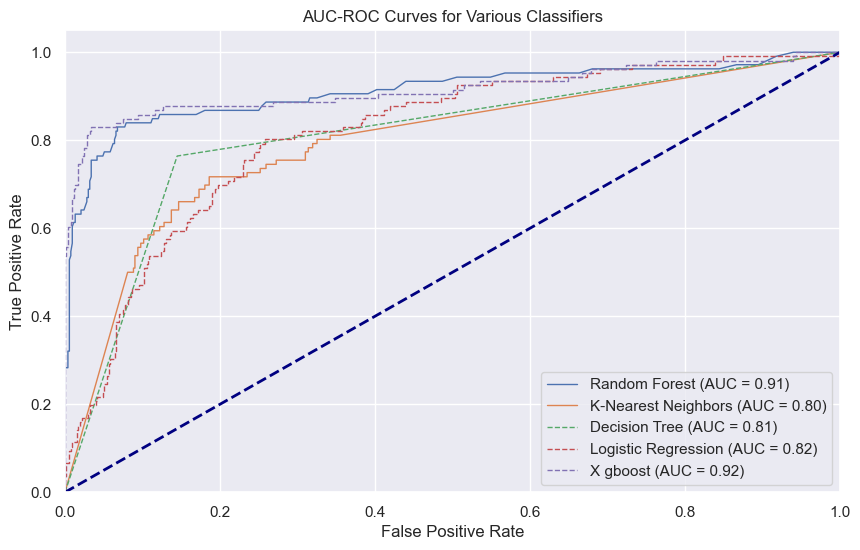

In [67]:
 
# Make predictions on the test data
y_pred_rfc = rf_smote.predict(X_test)
y_pred_prob_rfc = rf_smote.predict_proba(X_test)

# AUC-ROC curve for Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc[:, 1])
roc_auc_rfc = roc_auc_score(y_test, y_pred_prob_rfc[:, 1])

# Make predictions on the test data
y_pred_knn = knn_smote.predict(X_test)
y_pred_prob_knn = knn_smote.predict_proba(X_test)

# AUC-ROC curve for K nearest neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn[:, 1])

# Make predictions on the test data
y_pred_dtc = df_smote.predict(X_test)
y_pred_prob_dtc = df_smote.predict_proba(X_test)

# AUC-ROC curve for Decision Tree
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_prob_dtc[:, 1])
roc_auc_dtc = roc_auc_score(y_test, y_pred_prob_dtc[:, 1])

# Make predictions on the test data
y_pred_log = lrg_smote.predict(X_test)
y_pred_prob_log = lrg_smote.predict_proba(X_test)

# AUC-ROC curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log[:, 1])
roc_auc_log = roc_auc_score(y_test, y_pred_prob_log[:, 1])

# Make predictions on the test data
y_pred_xgboost = xgboost.predict(X_test)
y_pred_prob_xgboost= xgboost.predict_proba(X_test)

# AUC-ROC curve for xgboost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_prob_xgboost[:, 1])
roc_auc_xgboost = roc_auc_score(y_test, y_pred_prob_xgboost[:, 1])

# AUC-ROC curves for the four models
plt.figure(figsize=(10, 6))

# Random Forest
plt.plot(fpr_rfc, tpr_rfc, lw=1, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

# K-Nearest Neighbors
plt.plot(fpr_knn, tpr_knn, lw=1, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Decision Tree
plt.plot(fpr_dtc, tpr_dtc, lw=1, linestyle='--', label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')

# Logistic Regression
plt.plot(fpr_log, tpr_log, lw=1, linestyle='--', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')


# xgboost
plt.plot(fpr_xgboost, tpr_xgboost, lw=1, linestyle='--', label=f'X gboost (AUC = {roc_auc_xgboost:.2f})')

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Various Classifiers')
plt.legend(loc="lower right")
plt.show()



My best performing model is the XgBoost models with an AUC score of 0.92%

In [ ]:
X_train

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total calls_incl_cs,total minutes,international plan,voice mail plan
562,-0.057511,1.442538,0.388280,-0.665776,1.263180,0.830992,-0.552464,0.111054,-0.407428,0.340413,-0.418591,0.161963,0.614008,0,1
2102,0.242308,-0.597770,1.231736,0.367437,0.309285,-0.564980,-0.416785,-0.046831,0.886145,-0.619668,0.337660,-0.164886,0.707300,0,0
2717,1.016841,2.171219,-0.300481,0.160794,-1.289833,0.727587,0.949842,1.426766,-2.132192,0.820454,-1.174843,1.320789,-0.429977,0,1
1838,-2.506035,1.296802,0.522718,0.729061,-0.314032,0.675884,-0.454146,2.321450,-0.766754,2.260575,-0.418591,2.241908,-0.140104,0,1
2619,1.141765,1.952615,-0.407294,0.419097,-0.222427,-1.702438,0.515274,-1.257286,0.311223,-1.099709,1.093911,-1.472281,-0.069024,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,-0.632165,1.296802,0.644264,0.470758,0.088237,-0.668385,-1.301651,2.110936,-0.766754,-1.099709,-0.418591,0.993941,-0.321136,0,1
1191,1.116781,-0.597770,-0.359412,-1.957292,0.151962,0.624181,-0.456112,-0.099460,-0.371496,-0.619668,0.337660,-0.848297,-0.401100,1,0
1364,0.342248,-0.597770,1.204112,-0.200830,0.994337,-1.288817,1.364746,1.268880,1.245470,1.780535,-0.418591,-0.046032,2.090024,0,0
906,-0.707120,-0.597770,0.614798,-0.304152,-0.238358,0.210560,-1.270189,-0.573116,1.173605,-0.619668,-1.174843,-0.462021,-0.443304,0,0


### Feaature Imoportance with smote

In [68]:
# Initialize a base classifier
clf = RandomForestClassifier()

# Initialize RFECV (Recursive Feature Elimination with Cross-Validation)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV to your data
rfecv.fit(X_train_smote, y_train_smote)

# Get the selected features
selected_features = X_train_smote.columns[rfecv.support_]
selected_features


Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total calls_incl_cs',
       'total minutes', 'international plan', 'voice mail plan'],
      dtype='object')

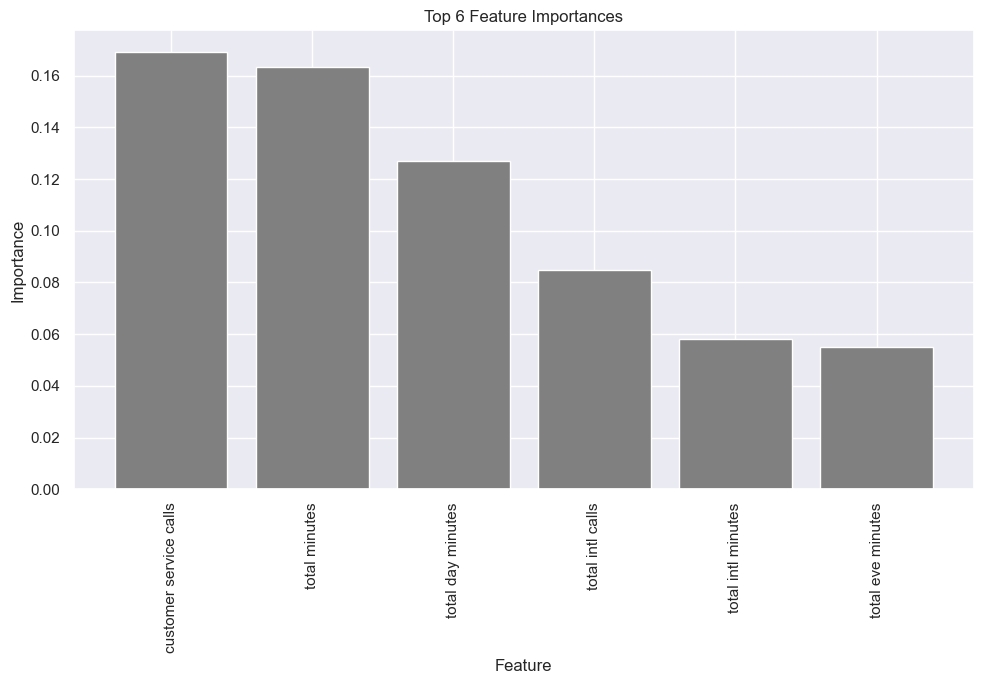

In [69]:
importances = rfecv.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
selected_features = X_train_smote.columns[rfecv.support_]

# Select the top N features based on their importance scores
top_n = 6 # Change this value to select a different number of top features
top_features = selected_features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Plot the top N features
plt.figure(figsize=(10, 7))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), top_importances, align="center",color = 'grey')
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [70]:
top_features

Index(['customer service calls', 'total minutes', 'total day minutes',
       'total intl calls', 'total intl minutes', 'total eve minutes'],
      dtype='object')

### Feature Importance Without smote

In [71]:
# Initialize a base classifier
clf = RandomForestClassifier()

# Initialize RFECV (Recursive Feature Elimination with Cross-Validation)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV to your data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
selected_features

Index(['number vmail messages', 'total day minutes', 'total eve minutes',
       'total night minutes', 'total intl minutes', 'total intl calls',
       'customer service calls', 'total minutes', 'international plan'],
      dtype='object')

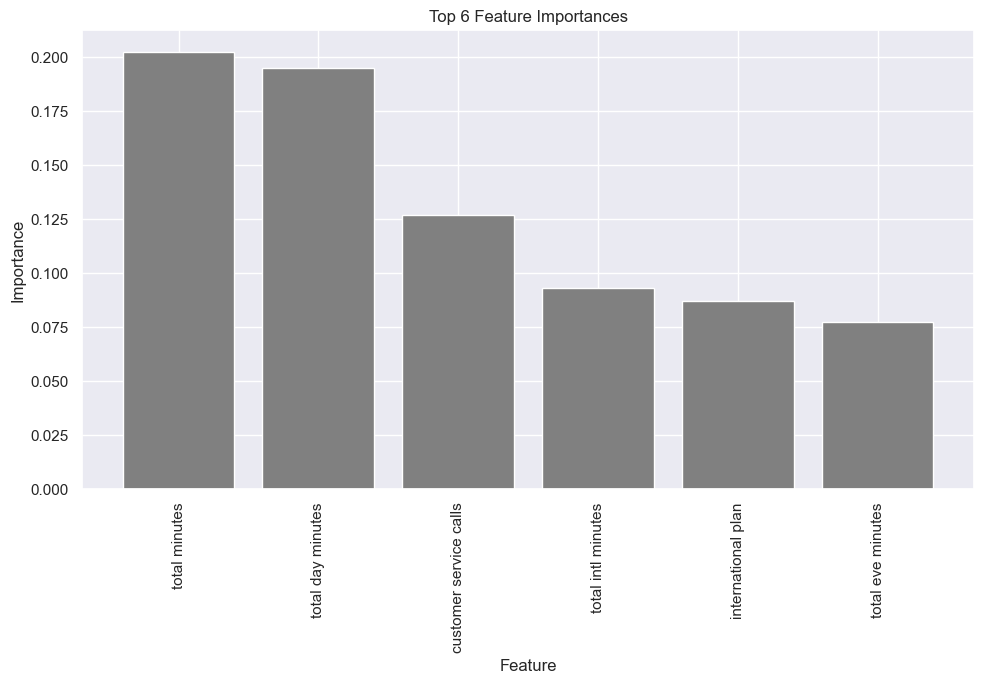

In [72]:
importances = rfecv.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
selected_features = X_train.columns[rfecv.support_]

# Select the top N features based on their importance scores
top_n = 6 # Change this value to select a different number of top features
top_features = selected_features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Plot the top N features
plt.figure(figsize=(10, 7))
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), top_importances, align="center",color = 'grey')
plt.xticks(range(top_n), top_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

### Model Evaluation

Accuracy: 0.9420062695924765
confusion_matrix for XGBoost
 [[517  15]
 [ 22  84]]
*************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       532
           1       0.85      0.79      0.82       106

    accuracy                           0.94       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.94      0.94      0.94       638

Test ROC AUC Score: 0.9163711164704214


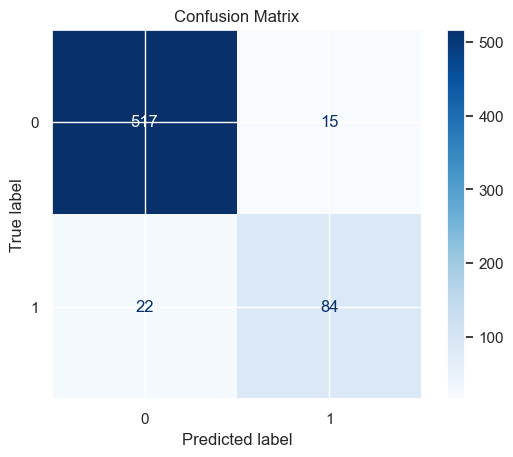

In [73]:
 
# Print performance metrics
print("Accuracy:", accuracy)
print("confusion_matrix for XGBoost\n",confusion_matrix(y_test,y_test_pred))
print("*"*49)

print(classification_report(y_test, y_test_pred))

 

# AUC-ROC curve for xgboost
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_prob_xgboost[:, 1])
roc_auc_xgboost = roc_auc_score(y_test, y_pred_prob_xgboost[:, 1])
print("Test ROC AUC Score:", roc_auc_xgboost)

 
confusion_matrix(y_test, y_test_pred, classes=xgboost.classes_)


- My best model, XGBoost shows a strong performance with high accuracy, reasonable precision, recall, and F1-scores for both classes, and a high ROC AUC score.
- The model effectively identifies both churned and non-churned customers, but there may be opportunities to further improve performance, particularly in reducing false positives and false negatives

#### Using Xgboost to predict the percentage of Customers who are Likely to churn

In [74]:
# Get the predicted probabilities for class 1 (churned)
churned_probab = y_pred_prob_xgboost[:, 1]

# Print the predicted probabilities
print(churned_probab)


[1.04232207e-01 3.67197348e-03 1.82336681e-02 2.94400076e-03
 3.15071130e-03 2.40447093e-03 7.83923328e-01 3.68341431e-03
 3.39816045e-03 7.30196945e-03 5.67087065e-03 4.22590822e-02
 4.54913173e-03 7.33592361e-03 9.97269213e-01 7.61439744e-03
 9.63080764e-01 1.07343262e-03 3.82307082e-01 3.04076239e-03
 3.54648456e-02 2.76873052e-01 2.27453373e-03 9.96975064e-01
 6.71809679e-03 5.10047888e-03 9.86140013e-01 3.96709470e-03
 3.38818063e-03 1.47009604e-02 1.62647218e-02 3.73279482e-01
 1.79076602e-03 4.42307489e-03 2.39395397e-03 9.93716955e-01
 4.98340232e-03 3.97909462e-01 5.01583330e-02 6.86945796e-01
 2.46204785e-03 1.13620318e-01 1.34738919e-03 9.03000124e-04
 2.25314479e-02 9.95323837e-01 6.11183405e-01 5.64612029e-03
 3.92253464e-03 6.34147227e-02 1.12768030e-03 2.37006441e-01
 1.82997389e-03 3.51208728e-03 2.79058572e-02 1.45524181e-02
 1.20697019e-03 7.19345082e-03 6.96459319e-03 1.71775732e-03
 2.43373471e-03 8.54397565e-03 9.92342174e-01 3.64698819e-03
 1.10389292e-02 2.658361

In [75]:
# Set threshold (example)
threshold = 0.1449

# Convert probabilities to binary predictions based on the threshold
predictions = [1 if prob >= threshold else 0 for prob in churned_probab]

# Print the binary predictions
print(predictions)


[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [79]:
 # Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# classification report
class_report = classification_report(y_test, predictions)

# ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Filter the churn predicted customers 
churn_predicted_customers = X_test[y_test == 1]
print("Customers predicted to churn:", churn_predicted_customers)


Accuracy: 0.9153605015673981
Confusion Matrix:
 [[495  37]
 [ 17  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       532
           1       0.71      0.84      0.77       106

    accuracy                           0.92       638
   macro avg       0.84      0.89      0.86       638
weighted avg       0.92      0.92      0.92       638

ROC AUC Score: 0.8850368846644914
Customers predicted to churn:       account length  number vmail messages  total day minutes  \
1530       -0.507240              -0.597770           1.506136   
1898        1.441585              -0.597770           1.771327   
498        -0.657150              -0.597770           0.583491   
407         0.517142              -0.597770          -0.414660   
830         0.492157              -0.597770          -0.219450   
...              ...                    ...                ...   
1240        0.167353               1.879747         

In [77]:
# Filter out customers predicted to churn
churn_predicted_customers = X_test[y_test == 1]
print("Customers predicted to churn:", churn_predicted_customers)


Customers predicted to churn:       account length  number vmail messages  total day minutes  \
1530       -0.507240              -0.597770           1.506136   
1898        1.441585              -0.597770           1.771327   
498        -0.657150              -0.597770           0.583491   
407         0.517142              -0.597770          -0.414660   
830         0.492157              -0.597770          -0.219450   
...              ...                    ...                ...   
1240        0.167353               1.879747          -0.322580   
655        -0.557210              -0.597770          -0.405452   
2882        1.916298              -0.597770          -1.015024   
2347       -0.832044               1.515406           0.292517   
293        -0.132466               2.098351          -0.127370   

      total day calls  total eve minutes  total eve calls  \
1530         2.072237           0.297337         0.107155   
1898         0.109133          -0.224418         0.4173

In [81]:
# Sum  of the total predictions
total_values= len(predictions)

# number of instances predicted to churn
churn_values = sum(predictions)

# customers predicted to churn percentage
percentage_churn= (churn_values / total_values) * 100

print("Percentage of customers predicted to churn:", percentage_churn)


Percentage of customers predicted to churn: 19.74921630094044


My Xgboost model has predicted 19.74% customer churn rate.Putting in place my best performing features.`customer service calls`, `total minutes`, `total day minutes`, `total intl calls`, `total intl minutes`, and `total eve minutes`,`international plan`. These features play a crucial role in predicting whether a customer will churn or not.

### Conclusion

Conclusions:

- Model Performance: The XGBoost model achieved a high accuracy of approximately 94%, indicating that it performs well in predicting customer churn.
- Important Features: The most important features identified by the model are `customer service calls`, `total minutes`, `total day minutes`, `total intl calls`, `total intl minutes`, and `total eve minutes`,`international plan`. These features play a crucial role in predicting whether a customer will churn or not.

### Recommendations

**Recommendations:**

- Focus on Customer Service: The number of customer service calls appears to be a significant predictor of churn. It's essential to pay attention to customer complaints and issues promptly to address their concerns and improve satisfaction.
- Analyze Usage Patterns: Total usage minutes during different times of the day ('total day minutes', 'total eve minutes', 'total intl minutes') and the number of international calls ('total intl calls') can provide insights into customers' usage patterns. Analyzing these patterns can help tailor services and offers to meet their needs better.
 
- Proactive Communication: Implement proactive communication strategies to engage with customers before they consider churning. This could include personalized emails, messages, or calls to check their satisfaction, offer assistance, or provide special promotions.
- Continuous Monitoring: Continuously monitor customer behavior and feedback to identify emerging trends and adjust retention strategies accordingly. Regularly updating the model with new data and reevaluating feature importance can help maintain its predictive accuracy over time.
> By putting this recommendations in place the company which be able to reduce customer churn rates

### Next Steps

 
 - Monitor strategies, track churn, satisfaction, usage. Adjust based on insights, feedback, performance evaluation regularly.

 - Explore additional data sources or collect more data to enhance the predictive capabilities of the model. Refine the model by experimenting with different algorithms, hyperparameters, or feature engineering techniques to improve its performance.
 
- Gather customer feedback regularly to improve services, create new offerings, and strengthen relationships. Use surveys, interviews, and feedback channels to understand needs, preferences, and enhance overall customer experience.

-  Create a lasting plan for keeping customers by building strong relationships, encouraging loyalty, and providing great experiences. Use predictive analytics and machine learning to support long-term growth and stay ahead.